# UCCB3224 Data Mining Techniques Assignment

### Group 11
Group Members:
- Chia Kee Ling, 18065706 (P3)
- Choo Yong Quan, 1803979 (P3)
- Chow Shin Jie, 1804372 (P3)
- Ong Zi Yan, 1804375 (P3)

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Data Collection

In [2]:
df = pd.read_csv('dataset.csv', na_values = '?')

# 3. Data Understanding 

## 3.1 Data Exploration

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.shape

(90, 18)

In [6]:
df.isnull()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

## 3.2 Numerical Feature Analysis

In [8]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [9]:
df.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


Show the exact data of each numerical feature:

In [10]:
num = df[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Longitude', 'Latitude']]
num

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,1.0,0,-80.577366,28.561857
1,2,525.000000,1,1.0,0,-80.577366,28.561857
2,3,677.000000,1,1.0,0,-80.577366,28.561857
3,4,500.000000,1,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,1.0,0,-80.577366,28.561857
...,...,...,...,...,...,...,...
85,86,15400.000000,2,5.0,2,-80.603956,28.608058
86,87,15400.000000,3,5.0,2,-80.603956,28.608058
87,88,15400.000000,6,5.0,5,-80.603956,28.608058
88,89,15400.000000,3,5.0,2,-80.577366,28.561857


Use correlation matrix and heatmap to represent the quantifiable relationship among the features:

Text(0.5, 1.0, 'Correlation matrix & Heatmap')

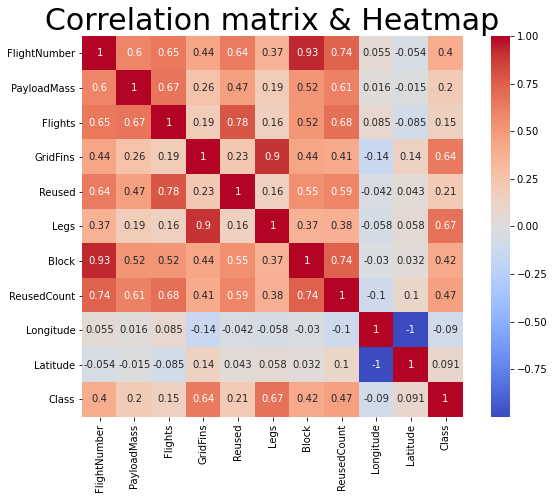

In [11]:
plt.figure(figsize = (10, 7))
corrmat = df.corr()
sns.heatmap(corrmat, square = True, annot = True, cbar = True, cmap = "coolwarm");
plt.title('Correlation matrix & Heatmap', fontsize = 30)

From the heatmap above, we can identify that GridFins and Legs has very high correlation as their combination gives a positive correlation of 0.9 while Longitude and Latitude has relatively low correlation. We can say that GridFins and Legs might be the key features to reduce costs and maximize profit of rocket launching.

Use multiple pairwise bivariate distributions to show the relationship for each pair of columns/features in data.

<Figure size 1080x1080 with 0 Axes>

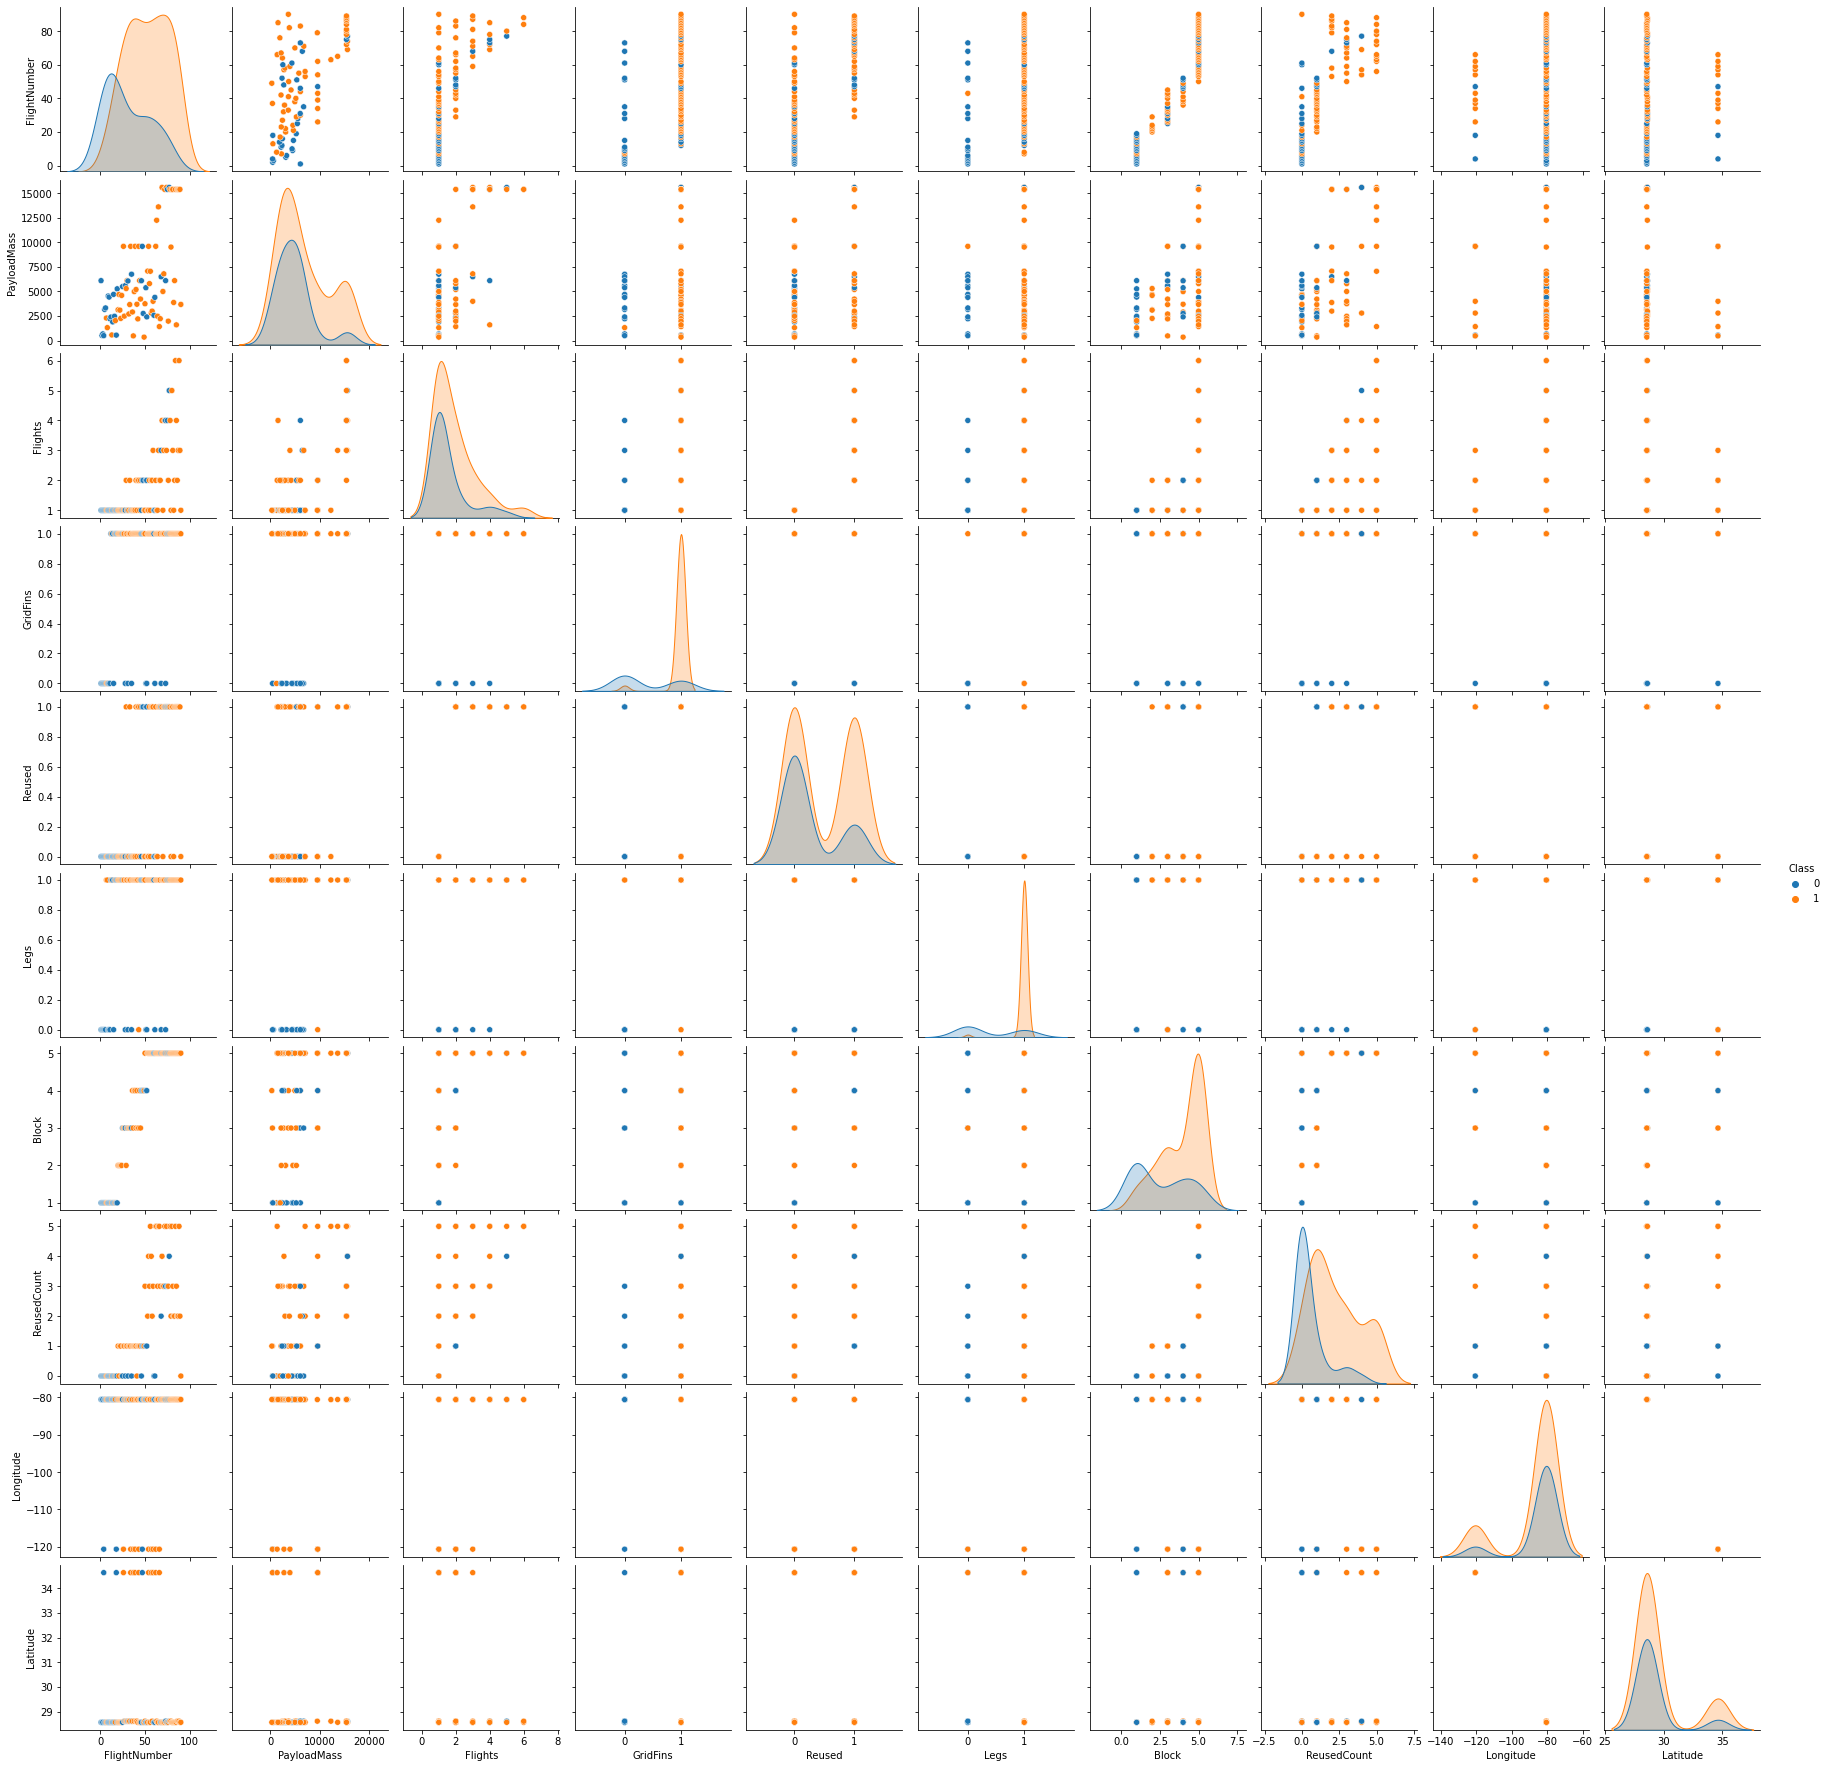

In [12]:
plt.figure(figsize = (15, 15))
sns.pairplot(df, hue = 'Class')
plt.show()

## 3.3 Categorical Feature Analysis

In [13]:
cat = df[['Date','BoosterVersion','Orbit','LaunchSite','Outcome','GridFins','Reused','Legs','LandingPad','Serial','Class']]
cat

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,0
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,0
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,0
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,0
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,0
...,...,...,...,...,...,...,...,...,...,...,...
85,2020-09-03,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060,1
86,2020-10-06,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058,1
87,2020-10-18,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051,1
88,2020-10-24,Falcon 9,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060,1


In [14]:
cat.isnull().sum()

Date               0
BoosterVersion     0
Orbit              0
LaunchSite         0
Outcome            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Serial             0
Class              0
dtype: int64

LandingPad contains 26 null values, dropping it may reduce the size of the dataset. Thus, we decide to replace those null values with 'None' which indicates not applicable in Data Preprocessing stage later.

In [15]:
cat.value_counts()

Date        BoosterVersion  Orbit  LaunchSite    Outcome     GridFins  Reused  Legs  LandingPad                Serial  Class
2015-01-10  Falcon 9        ISS    CCAFS SLC 40  False ASDS  True      False   True  5e9e3032383ecb761634e7cb  B1012   0        1
2015-04-14  Falcon 9        ISS    CCAFS SLC 40  False ASDS  True      False   True  5e9e3032383ecb761634e7cb  B1015   0        1
2018-11-15  Falcon 9        GTO    KSC LC 39A    True ASDS   True      True    True  5e9e3032383ecb6bb234e7ca  B1047   1        1
2018-12-03  Falcon 9        SSO    VAFB SLC 4E   True ASDS   True      True    True  5e9e3033383ecbb9e534e7cc  B1046   1        1
2018-12-05  Falcon 9        ISS    CCAFS SLC 40  False RTLS  True      False   True  5e9e3032383ecb267a34e7c7  B1050   0        1
                                                                                                                               ..
2018-01-08  Falcon 9        LEO    CCAFS SLC 40  True RTLS   True      False   True  5e9e303238

In [16]:
cat.nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
GridFins           2
Reused             2
Legs               2
LandingPad         5
Serial            53
Class              2
dtype: int64

In [17]:
cat.select_dtypes('object').nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
LandingPad         5
Serial            53
dtype: int64

In [18]:
for column in cat:
    print('%s\n%s\n' % (column, cat[column].value_counts()))

Date
2020-04-22    1
2018-12-03    1
2014-09-21    1
2018-03-30    1
2018-06-29    1
             ..
2019-08-06    1
2020-05-30    1
2013-09-29    1
2018-12-05    1
2014-04-18    1
Name: Date, Length: 90, dtype: int64

BoosterVersion
Falcon 9    90
Name: BoosterVersion, dtype: int64

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
GEO       1
ES-L1     1
HEO       1
SO        1
Name: Orbit, dtype: int64

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

GridFins
True     70
False    20
Name: GridFins, dtype: int64

Reused
False    53
True     37
Name: Reused, dtype: int64

Legs
True     71
False    19
Name: Legs, dtype: int64

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e53

We can notice that BoosterVersion has only 1 unique value which is 'Falcon 9' and hence this feature might not be useful during the classification task.

<AxesSubplot:xlabel='Serial'>

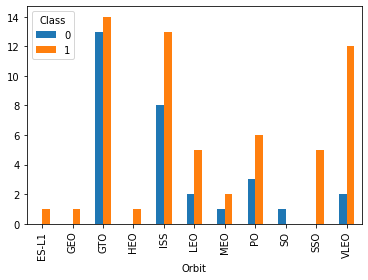

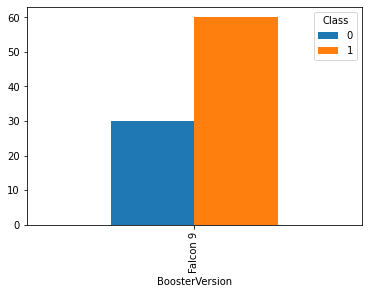

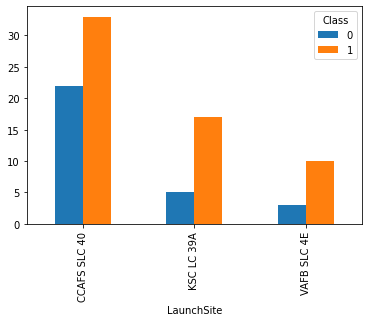

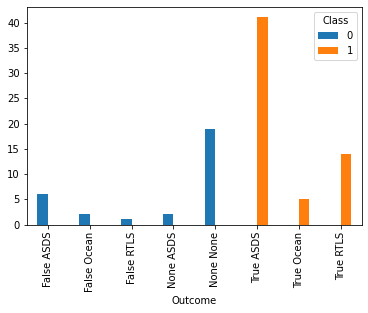

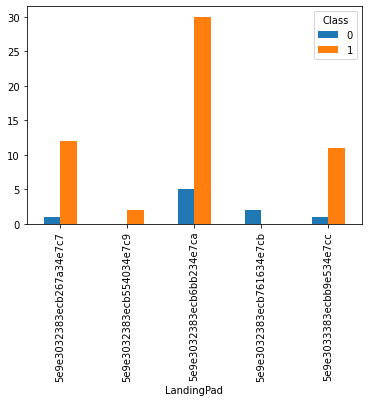

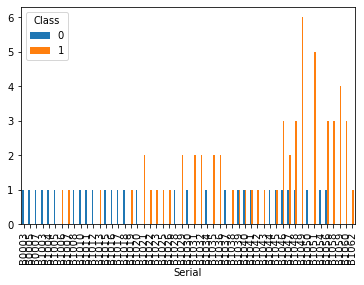

In [19]:
df.groupby(['Orbit', 'Class']).size().unstack().plot(kind = 'bar')
df.groupby(['BoosterVersion', 'Class']).size().unstack().plot(kind = 'bar')
df.groupby(['LaunchSite', 'Class']).size().unstack().plot(kind = 'bar')
df.groupby(['Outcome', 'Class']).size().unstack().plot(kind = 'bar')
df.groupby(['LandingPad', 'Class']).size().unstack().plot(kind = 'bar')
df.groupby(['Serial', 'Class']).size().unstack().plot(kind = 'bar')

Date consists of very large number of unique value counts, we consider to plot its relation with Class by performing manual grouping (separated by years or months):

<AxesSubplot:xlabel='Month'>

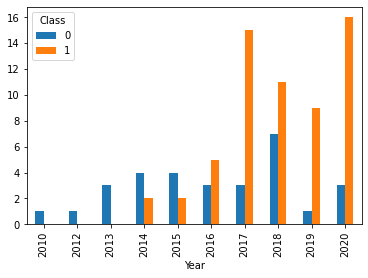

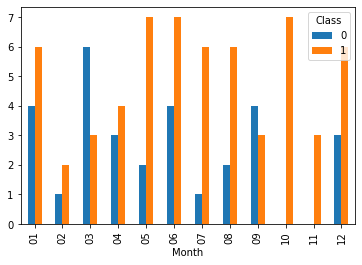

In [20]:
year = []
month = []
for i in df["Date"]:
    year.append(i.split("-")[0])
    month.append(i.split("-")[1])

df1 = df.copy()
df1["Year"] = year
df1.groupby(['Year', 'Class']).size().unstack().plot(kind = 'bar')

df2 = df.copy()
df2["Month"] = month
df2.groupby(['Month', 'Class']).size().unstack().plot(kind = 'bar')

From these two graphs, it seems that the launching never failed in October and November.

From the graphs above, we can say that all these categorical features might be crucial for the analysis and prediction afterwards, except BoosterVersion that only have one unique value throughout the data. The mentioned crucial categorical features might help in achieving our business goals.

## 3.4 Split data to training set and testing set

In [21]:
spacex_train, spacex_test = train_test_split(df, test_size = 0.2, random_state = 2)
print("Original data shape: {}".format(df.shape))
print("Splitted training data shape: {}".format(spacex_train.shape))
print("Splitted testing data shape: {}".format(spacex_test.shape))

Original data shape: (90, 18)
Splitted training data shape: (72, 18)
Splitted testing data shape: (18, 18)


## 3.5 Exploratory Data Analysis (EDA) on the training dataset

#### 1. Visualize the relationship between LaunchSite and FlightNumber to get insight on which launch site might resulting in better landing outcome:

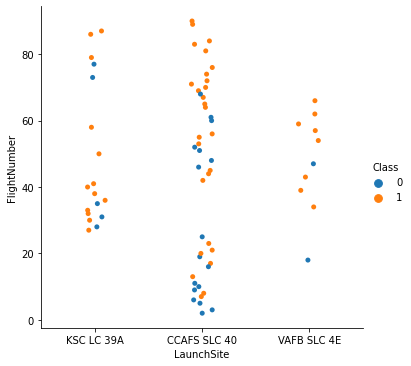

In [22]:
sns.catplot(y = "FlightNumber", x = "LaunchSite", hue = "Class", data = spacex_train)
plt.show()

We can observe that most launches are done at CCAFS SLC 40 while least at VAFB SLC 4E. As more and more rockets were being launched, launching at CCAFS SLC 40 and VAFB SLC 4E launch sites gave positive results. Through the launching, we can say that VAFB SLC 4E gives a better overall landing success rate.

#### 2. Visualize the relationship between PayloadMass and LaunchSite to get insight on which launch site results in better landing outcome when the rockets were carrying different weight of payloads:

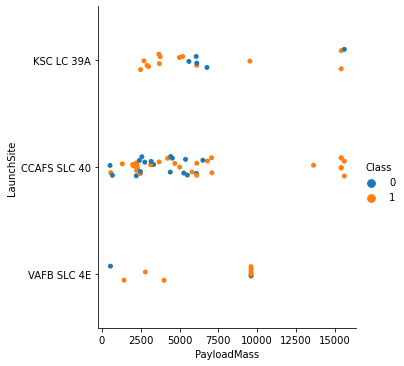

In [23]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", hue = "Class", data = spacex_train)
plt.show()

Launch site CCAFS SLC 40 and VAFB SLC 4E had a higher chance of success as payload mass getting higher. Meanwhile, KSC LC 39A VAFB SLC 4E had a higher chance of success when it carried a lighter payload mass.

#### 3. Visualize the relationship between Orbit and PayloadMass to get insight on which Orbit can give better landing outcome when the rockets carried different payload mass:

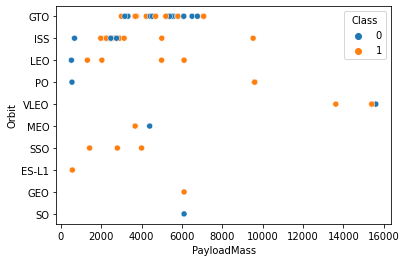

In [24]:
sns.scatterplot(x = spacex_train["PayloadMass"], y = spacex_train["Orbit"], data = spacex_train, hue = "Class")
plt.show()

We can say that the heavier the payloads, the greater the success rate of rocket launching for most of the orbit. Meanwhile, LEO orbit gives negative results as payload mass increases. Outcome from GTO orbit seems not related to payload mass. On the other hand, we cannot say that payload mass will have an impact on choosing HEO orbit and ES-L1 for launching yet since they are only being adapted once.

#### 4. Visualize the relationship between FlightNumber and Orbit type to get insight on which orbit will have better launching outcome as SpaceX launches more rockets:

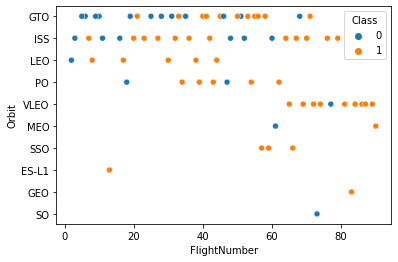

In [25]:
sns.scatterplot(x = spacex_train["FlightNumber"], y = spacex_train["Orbit"], data = spacex_train, hue = "Class")
plt.show()

As SpaceX keeps launching rockets, it can be seen that LEO orbit and SSO orbit gave positive outcomes. There seems to be no relationship between flight number and orbit when VLEO orbit, ISS orbit, PO orbit and GTO orbit were used. Meanwhile for GEO orbit, SO orbit, HEO orbit, MEO orbit and ES-L1 orbit they have only been used a few times so we cannot say that they have higher or lower success landing rate.

#### 5. Visualize the relationship between Orbit chosen for launching and Class (outcome of the launching) to get insight on whether the orbit been used will affect the landing outcome:

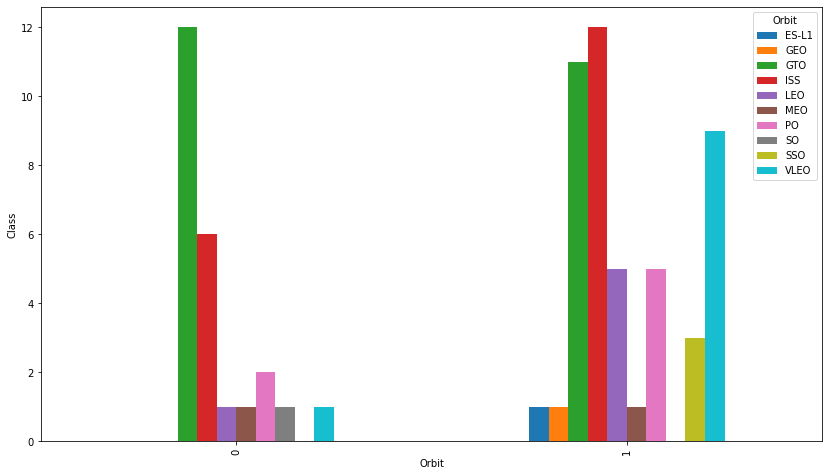

In [26]:
orbitsr = spacex_train.groupby(['Orbit', 'Class'])['Class'].count().unstack(0).plot.bar(figsize = (14, 8))
_ = orbitsr.set_xlabel('Orbit')
_ = orbitsr.set_ylabel('Class')


We can see that VLEO orbit, PO orbit, LEO orbit and ISS orbit have higher success rate, GTO orbit has higher failure rate, and other orbits had too few launches so we cannot derive a clear conclusion on their success rate.

#### 6. Visualize the relationship betwwen LaunchSite and both Longitude and Latitude to get insight on whether the same launch site would have the same longitude and latitude:

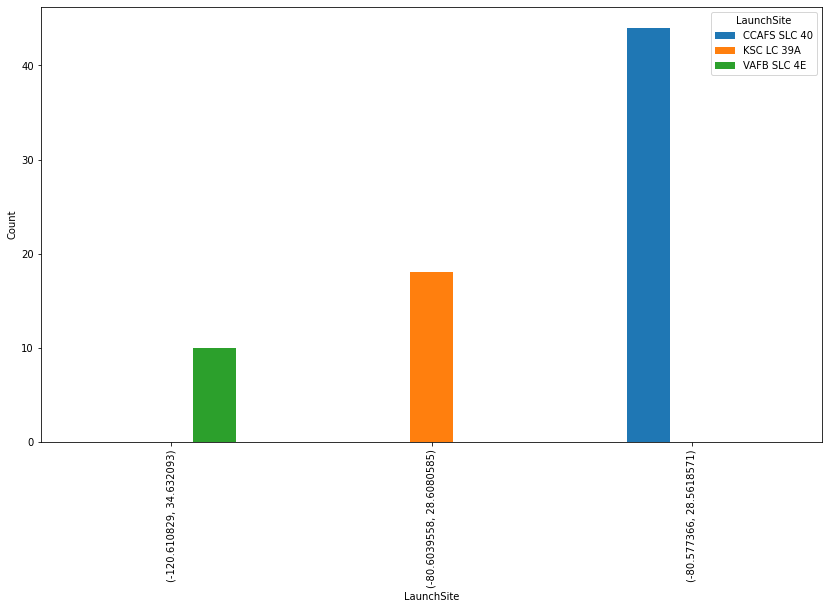

In [27]:
launchlonglati=spacex_train.groupby(['LaunchSite','Longitude','Latitude'])['Class'].count().unstack(0).plot.bar(figsize=(14,8))
_ = launchlonglati.set_xlabel('LaunchSite')
_ = launchlonglati.set_ylabel('Count')

From the graph above we can see that each launch site has the same longitude and latitude.

#### 7. Visualize the relationship between FlightNumber and PayloadMass to get the insight on whether as more rockets been launched, they were able to carry heavier payload:

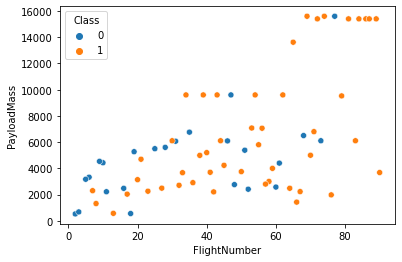

In [28]:
sns.scatterplot(x = spacex_train["FlightNumber"], y = spacex_train["PayloadMass"], data = spacex_train, hue = "Class")
plt.show()

From the graph above, we can say that as SpaceX launched more rockets, they were more capable of carrying heavier payload.

## 3.6 Object Queries

#### 1. Display the total payload mass carried out by rockets launched by SpaceX:

In [29]:
spacex_train.groupby(['BoosterVersion']).sum()['PayloadMass']

BoosterVersion
Falcon 9    431077.387647
Name: PayloadMass, dtype: float64

#### 2. Find the date when the first landing launched:

In [30]:
min(spacex_train['Date'])

'2012-05-22'

#### 3. Calculate the total number of success outcomes for each orbit type:

In [31]:
spacex_train.groupby(['Orbit']).sum()['Class']

Orbit
ES-L1     1
GEO       1
GTO      11
ISS      12
LEO       5
MEO       1
PO        5
SO        0
SSO       3
VLEO      9
Name: Class, dtype: int64

#### 4. List the total number of successful outcomes:

In [32]:
spacex_train['Class'].value_counts()

1    48
0    24
Name: Class, dtype: int64

#### 5. Calculate the total number of successful outcome for each launch site:

In [33]:
spacex_train.groupby(['LaunchSite']).sum()['Class']

LaunchSite
CCAFS SLC 40    27
KSC LC 39A      13
VAFB SLC 4E      8
Name: Class, dtype: int64

#### 6. Calculate the number of reused components been installed when using different orbits for launching:

In [34]:
spacex_train.groupby(['Orbit']).sum()['Reused']

Orbit
ES-L1     0
GEO       1
GTO       8
ISS       5
LEO       0
MEO       0
PO        3
SO        1
SSO       3
VLEO     10
Name: Reused, dtype: int64

#### 7. Calculate the number of times a component being reused on using different orbits:

In [35]:
spacex_train.groupby(['Orbit']).sum()['ReusedCount']

Orbit
ES-L1     0
GEO       2
GTO      24
ISS      22
LEO       3
MEO       0
PO       13
SO        3
SSO      12
VLEO     37
Name: ReusedCount, dtype: int64

# 4. Data Preparation & Preprocessing

In [36]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [37]:
dup = df.duplicated()
print((dup.sum()))

0


## 4.1 Numerical Features 

In [38]:
spacex_train.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
30,31,2017-05-15,Falcon 9,6070.0,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1034,-80.603956,28.608058,0
27,28,2017-03-16,Falcon 9,5600.0,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1030,-80.603956,28.608058,0
44,45,2018-01-31,Falcon 9,4230.0,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,NaN,3.0,1,B1032,-80.577366,28.561857,1
35,36,2017-08-14,Falcon 9,2910.0,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1039,-80.603956,28.608058,1
57,58,2018-11-15,Falcon 9,3000.0,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1047,-80.603956,28.608058,1


#### 1. We select out the numerical data from the original dataset (splitted data set):

In [39]:
num = df.select_dtypes(include = ['int64', 'float64'])
num.head()
num.shape

(90, 8)

#### 2. Longitude and Latitude are simply the LaunchSite's location which are not that useful and they are redundant for future works, hence these 2 features are dropped from numerical data list:

In [40]:
num.drop(["Longitude","Latitude","Class"], axis = 1, inplace = True)
num.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,1,6104.959412,1,1.0,0
1,2,525.000000,1,1.0,0
2,3,677.000000,1,1.0,0
3,4,500.000000,1,1.0,0
4,5,3170.000000,1,1.0,0


#### 3. Check whether are there any missing value in the numerical data:

In [41]:
num.isnull().sum()

FlightNumber    0
PayloadMass     0
Flights         0
Block           0
ReusedCount     0
dtype: int64

#### 4. We use z-score to find out how many standard deviations a data point is away from the mean. It allows us to convert the numerical data in our data set such that the mean is 0 and the standard deviation is 1:

In [42]:
Z = (num - num.mean()) / num.std()
Z.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,8.881784e-17,-2.652199e-16,-6.784696e-16,1.208910e-16,4.280527e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.703369e+00,-1.225849e+00,-6.502698e-01,-1.567115e+00,-9.680173e-01
25%,-8.516844e-01,-7.655933e-01,-6.502698e-01,-9.402691e-01,-9.680173e-01
50%,0.000000e+00,-2.989473e-01,-6.502698e-01,3.134230e-01,-3.833089e-01
75%,8.516844e-01,5.980803e-01,1.740159e-01,9.402691e-01,7.861080e-01
max,1.703369e+00,2.022514e+00,3.471159e+00,9.402691e-01,1.955525e+00


#### 5. Find and remove the outlier(s) existing in our numerical dataset (we select the data that has z-score of <= 3 and > -3): 

In [43]:
z_scores = stats.zscore(num)
abs_z_scores = np.abs(z_scores)
filtered_ent = (abs_z_scores <= 3).all(axis = 1)
print(filtered_ent)

df = df[filtered_ent]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True]


#### 6. We change Date in numerical data to Year and Month (derived feature) for better visualization and future works:

In [44]:
year = []
month = []
for i in df["Date"]:
    year.append(i.split("-")[0])
    month.append(i.split("-")[1])
# Convert the derived year and months to integer as appended data were not in integer
df["Year"] = np.array(year, dtype = 'int64')
df["Month"] = np.array(month, dtype = 'int64')

#### 7. Finalize the numerical data/features after outliers were discarded: 

In [45]:
num_f = df[['Year', 'Month', 'FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']]
print('Row no. after discarding outliers = %d' % num_f.shape[0])

Row no. after discarding outliers = 88


In [46]:
num_f.shape

(88, 7)

#### 8. We perform standardization to ensure data to have same scale in terms of Feature to avoid bias in the outcome:

In [47]:
# Fitting columns
scale = StandardScaler()
num_f = scale.fit_transform(num_f)
# Transforming columns
print('Mean:\n',num_f.mean (axis = 0))
print('\nStd Deviation:\n',num_f.std (axis = 0))
num_f = pd.DataFrame(num_f)
num_f.columns = ['Year', 'Month', 'FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']
num_f

Mean:
 [-2.87244975e-14 -1.00929366e-16  7.06505561e-17  1.21115239e-16
  2.52323415e-17  8.07434927e-17 -5.04646829e-18]

Std Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


,Year,Month,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,-3.382197,-0.077417,-1.706656,0.046907,-0.668155,-1.552895,-0.961598
1,-2.456432,-0.373623,-1.667494,-1.192099,-0.668155,-1.552895,-0.961598
2,-1.993550,-0.966034,-1.628332,-1.158348,-0.668155,-1.552895,-0.961598
3,-1.993550,0.811200,-1.589170,-1.197651,-0.668155,-1.552895,-0.961598
4,-1.993550,1.699816,-1.550008,-0.604788,-0.668155,-1.552895,-0.961598
...,...,...,...,...,...,...,...
83,1.246626,0.514994,1.582940,-0.953400,2.223531,0.966086,0.864747
84,1.246626,0.811200,1.622102,2.110833,0.295741,0.966086,0.255965
85,1.246626,1.107405,1.661263,2.110833,1.259636,0.966086,0.255965
86,1.246626,1.107405,1.739587,2.110833,1.259636,0.966086,0.255965


## 4.2 Categorical Features

In [48]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,Month
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,6
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,5
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,3
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,9
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,12


#### 1. We select out the categorical data from the original dataset:

In [49]:
cat = df.select_dtypes(include=['object', 'boolean'])
cat.head()
cat.shape

(88, 10)

In [50]:
cat.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004


#### 2. Since BoosterVersion having the same value along all its rows, and other categorical features such as Date, Outcome and Serial are not useful and unhelpful in our future works so we drop them:

In [51]:
cat.drop(["BoosterVersion", "Date", "Outcome", "Serial"], axis = 1, inplace = True)
cat.head(5)

,Orbit,LaunchSite,GridFins,Reused,Legs,LandingPad
0,LEO,CCAFS SLC 40,False,False,False,NaN
1,LEO,CCAFS SLC 40,False,False,False,NaN
2,ISS,CCAFS SLC 40,False,False,False,NaN
3,PO,VAFB SLC 4E,False,False,False,NaN
4,GTO,CCAFS SLC 40,False,False,False,NaN


#### 3. Check whether are there any missing value in the categorical data:

In [52]:
cat.isnull().sum()

Orbit          0
LaunchSite     0
GridFins       0
Reused         0
Legs           0
LandingPad    26
dtype: int64

#### 4. We fill the null value found in LandingPad with value "None": 

In [53]:
cat['LandingPad'].fillna(value = "None", inplace = True)

#### 5. We do not need to deal with outliers in categorical data as outliers are not applicable for categorical data.
#### 6. Although Outcome itself is a bit complicated for our future works, but we still need the data of what is the landing site being used so we extract the landing site data from Outcome, rename it as "LandingSite" and append it back to our categorical data: 

In [54]:
landing_site = []
for i in df["Outcome"]:
    landing_site.append(i.split(" ")[1])
cat["LandingSite"] = np.array(landing_site, dtype = 'object')
cat

,Orbit,LaunchSite,GridFins,Reused,Legs,LandingPad,LandingSite
0,LEO,CCAFS SLC 40,False,False,False,None,None
1,LEO,CCAFS SLC 40,False,False,False,None,None
2,ISS,CCAFS SLC 40,False,False,False,None,None
3,PO,VAFB SLC 4E,False,False,False,None,Ocean
4,GTO,CCAFS SLC 40,False,False,False,None,None
...,...,...,...,...,...,...,...
84,SSO,CCAFS SLC 40,True,True,True,5e9e3032383ecb267a34e7c7,RTLS
85,VLEO,KSC LC 39A,True,True,True,5e9e3032383ecb6bb234e7ca,ASDS
86,VLEO,KSC LC 39A,True,True,True,5e9e3032383ecb6bb234e7ca,ASDS
88,VLEO,CCAFS SLC 40,True,True,True,5e9e3033383ecbb9e534e7cc,ASDS


#### 7. We use get_dummies to convert categorical variables into dummy/indicator variables. We reindex it so that we are able to merge it with numerical data afterwards:

In [55]:
cat_f = pd.get_dummies(cat, drop_first = True)
#cat_f = cat_f.drop([0,])
cat_f = cat_f.reset_index(drop=True)
cat_f.shape

(88, 23)

#### 8. We merge categorical features data with numerical features data:

In [56]:
spacex_f = pd.merge(num_f, cat_f, left_index = True, right_index = True)

In [57]:
spacex_f.shape
# This is the finalized data before we go for modeling

(88, 30)

#### 9. We further split the finalized data and output vector data into training set and test set:

In [58]:
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(spacex_f, y, test_size = 0.2, random_state = 2)

In [59]:
print(X_train.shape)
print(X_test.shape)

(70, 30)
(18, 30)


# 5. Model Training

#### 1. We define a function to return accuracy score, precision score, recall score and F1 score:

In [60]:
def score(y, y_pred):
    return [accuracy_score(y,y_pred), precision_score(y,y_pred), recall_score(y,y_pred), f1_score(y,y_pred)] 

#### 2. We do modeling in logistic regression, decision tree, k-nearest neighbors, support vector classifier and naive bayes:

In [61]:
clf_model = ['Logistic Regression','Decision Tree', 'KNN', 'SVC', 'Naive Bayes']

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 2)

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state = 2)

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 10)

from sklearn.svm import SVC
model4 = SVC(random_state = 2, probability = True)

from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

#### 3. We define a function to show how the model fits the training sets (results of accuracy score, precision score, recall score and F1 score):

In [62]:
result = []

for i, model in enumerate([model1, model2, model3, model4, model5]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    result.append(score(y_train, y_pred))
overall = pd.DataFrame(result, index = clf_model, columns = ['accuracy', 'precision', 'recall', 'f1 score'])
overall.round(decimals = 4)

,accuracy,precision,recall,f1 score
Logistic Regression,0.9286,0.9167,0.9778,0.9462
Decision Tree,1.0000,1.0000,1.0000,1.0000
KNN,0.8429,0.8696,0.8889,0.8791
SVC,0.9000,0.8654,1.0000,0.9278
Naive Bayes,0.6143,0.9500,0.4222,0.5846


#### 4. We use graph to visualize each model's accuracy score, precision score, recall score and F1 score:

<AxesSubplot:>

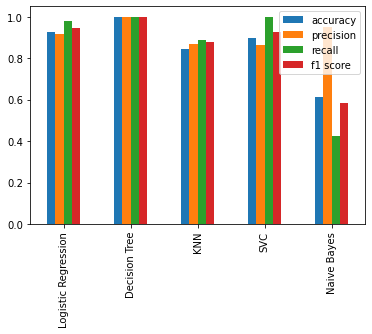

In [63]:
overall.plot(kind = 'bar')

From the result above, we noticed that the decision tree classifier has performed extremely well on the training set. This indicates that it has overfitting issue. Hence, it is not suitable to be selected as the final model for the prediction and classification task.

#### 5. We use confusion matrix to define the performance of different classification algorithms:

Logistic Regression


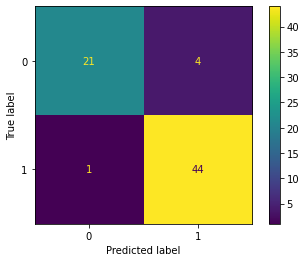

Decision Tree


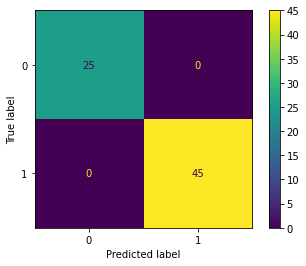

KNN


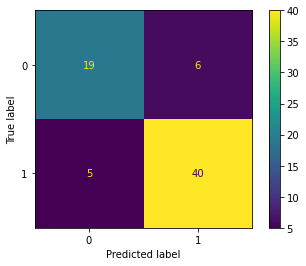

SVC


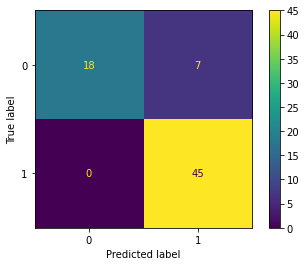

Naive Bayes


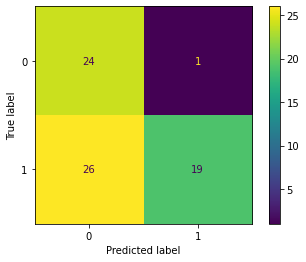

In [64]:
for i, model in enumerate([model1, model2, model3, model4, model5]):
    print(clf_model[i])
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

#### 6. To select the best model, we use cross validation with 5 folds to find out the best performed model:

In [65]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

for i, model in enumerate([model1, model2, model3, model4, model5]):
    print(clf_model[i])
    scores = cross_validate(model, X_train, y_train, cv = 5, scoring = scoring)
    cross_val_result = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1).T
    cross_val_result['mean'] = cross_val_result.mean(axis = 1)
    cross_val_result['std deviation'] = cross_val_result.std(axis = 1)
    print(cross_val_result.round(4))
    print("\n\n")

Logistic Regression
                     0       1       2       3       4    mean  std deviation
test_accuracy   0.9286  0.8571  0.6429  0.8571  0.9286  0.8429         0.1050
test_precision  0.9000  0.8182  0.7000  1.0000  0.9000  0.8636         0.1001
test_recall     1.0000  1.0000  0.7778  0.7778  1.0000  0.9111         0.1089
test_f1_score   0.9474  0.9000  0.7368  0.8750  0.9474  0.8813         0.0774



Decision Tree
                     0       1       2       3       4    mean  std deviation
test_accuracy   0.7857  0.8571  0.6429  0.8571  0.9286  0.8143         0.0969
test_precision  0.8750  0.8889  0.7000  0.8889  1.0000  0.8706         0.0965
test_recall     0.7778  0.8889  0.7778  0.8889  0.8889  0.8444         0.0544
test_f1_score   0.8235  0.8889  0.7368  0.8889  0.9412  0.8559         0.0702



KNN
                     0       1       2       3       4    mean  std deviation
test_accuracy   0.9286  0.8571  0.5714  0.7857  0.7857  0.7857         0.1195
test_precision  0.90

From the results of cross validation, logistic regression and SVC have scored the higher mean accuracy as compared with other models. However, logistic regression with a lower standard deviation indicates that its performance are more consistant than SVC model. 
#### Thus, logistic regression will be selected as the best model to perform parameter tuning. 

#### 7. We define a function to show how well would be the prediction by different models through cross validation:

In [66]:
result = []

for i, model in enumerate([model1, model2, model3, model4, model5]):
    y_pred = cross_val_predict(model, X_train, y_train, cv = 5)
    result.append(score(y_train, y_pred))
overall = pd.DataFrame(result, index = clf_model, columns = ['accuracy', 'precision', 'recall', 'f1 score'])
overall.round(decimals = 4)

,accuracy,precision,recall,f1 score
Logistic Regression,0.8429,0.8542,0.9111,0.8817
Decision Tree,0.8143,0.8636,0.8444,0.8539
KNN,0.7857,0.8261,0.8444,0.8352
SVC,0.8429,0.8400,0.9333,0.8842
Naive Bayes,0.4857,0.8000,0.2667,0.4000


#### 8. We plot a precision vs. recall curve graph to view the performance of the classification tasks by each model:

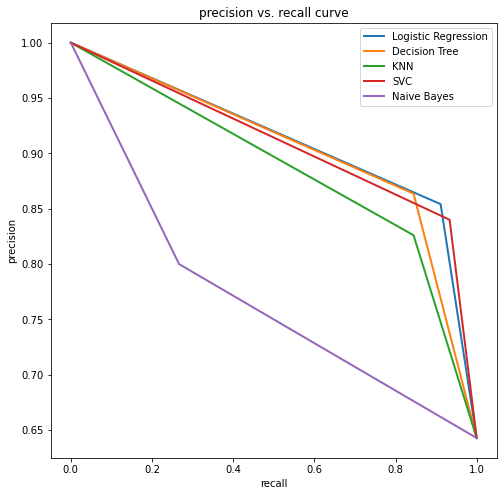

In [67]:
fig, ax = plt.subplots(figsize = (8, 8))

for i, model in enumerate([model1, model2, model3, model4, model5]):
    y_pred = cross_val_predict(model, X_train, y_train, cv = 5)
    precision, recall, threshold = precision_recall_curve(y_train, y_pred)
    ax.plot(recall, precision, lw = 2, label = clf_model[i])
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

From the Precision - Recall curve, logistic regression is a good model on the classification task as its curve is closest to the top right corner while naive bayes model is poorly performed on the dataset

#### 9. We plot a ROC curve graph and compute AUC score to view the performance of the classification tasks by each model:

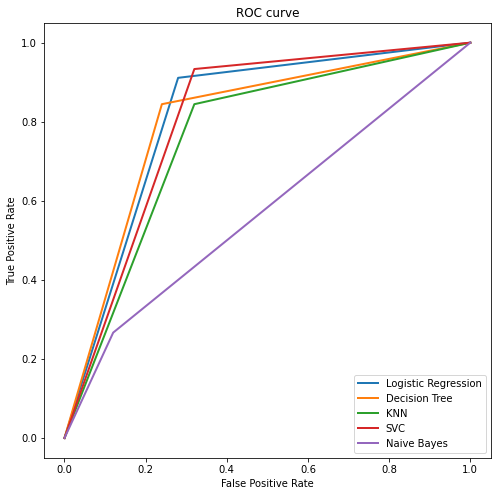

In [68]:
fig, ax = plt.subplots(figsize = (8, 8))

for i, model in enumerate([model1, model2, model3, model4, model5]):
    y_pred = cross_val_predict(model, X_train, y_train, cv = 5)
    fpr, tpr, threshold = roc_curve(y_train, y_pred)
    ax.plot(fpr, tpr, lw = 2, label = clf_model[i])
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [69]:
roc_score = []

for i, model in enumerate([model1, model2, model3, model4, model5]):
    y_pred = cross_val_predict(model, X_train, y_train, cv = 5)
    roc_score.append(roc_auc_score(y_train, y_pred))
auc = pd.DataFrame(roc_score, index = clf_model, columns = ['AUC Score'])
auc.round(decimals=4)    

,AUC Score
Logistic Regression,0.8156
Decision Tree,0.8022
KNN,0.7622
SVC,0.8067
Naive Bayes,0.5733


<AxesSubplot:>

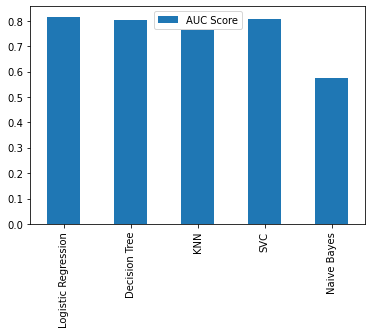

In [70]:
auc.plot(kind = 'bar')

#### 11. Hyperparameter finetuning on the best classification model (Logistic Regression):

In [71]:
param = [
    {
    'random_state': [2],
    'penalty':['l1', 'l2', 'none'], 
    'C':[0.01, 0.1, 1, 10, 100],
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter':[100, 1000, 2500, 5000]
    }
]
cv_search = GridSearchCV(LogisticRegression(), param_grid = param, cv = 10, n_jobs = -1, verbose = True, scoring = 'accuracy')
best_model = cv_search.fit(X_train, y_train)
best_clf = best_model.best_estimator_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [72]:
print("Best parameter: ", best_model.best_params_)
print("Score: ", best_model.best_score_)

Best parameter:  {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 2, 'solver': 'saga'}
Score:  0.8714285714285713


In [73]:
y_pred = best_model.predict(X_train)
print("Accuracy, Precision, Recall, F1 Score = ", score(y_train, y_pred))

Accuracy, Precision, Recall, F1 Score =  [0.9857142857142858, 1.0, 0.9777777777777777, 0.9887640449438202]


# 6. Model Testing

#### 1. We do model testing on the hypertuned Logistic Regression: 

In [74]:
y_pred = best_clf.predict(X_test)

test_ = {
    'Accuracy': score(y_test,y_pred)[0],
    'Precision': score(y_test,y_pred)[1],
    'Recall': score(y_test,y_pred)[2],
    'F1 score': score(y_test,y_pred)[3],
}

test_result = pd.Series(test_)
test_result

Accuracy     0.944444
Precision    1.000000
Recall       0.923077
F1 score     0.960000
dtype: float64

#### 2: Graph for visualizing the test results:

<AxesSubplot:>

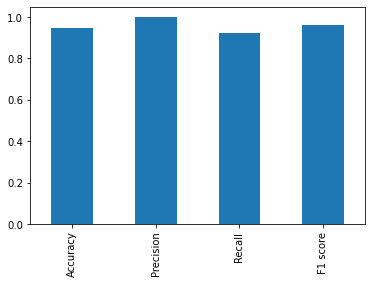

In [75]:
test_result.plot(kind = 'bar')

#### 3. We use a confusion matrix to define its performance:

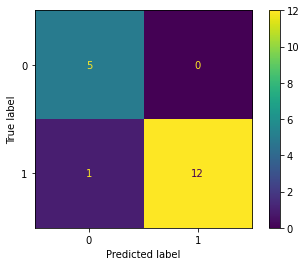

In [76]:
plot_confusion_matrix(best_clf, X_test, y_test)
plt.show()

#### 4. We plot a precision vs. recall curve graph to view its performance:

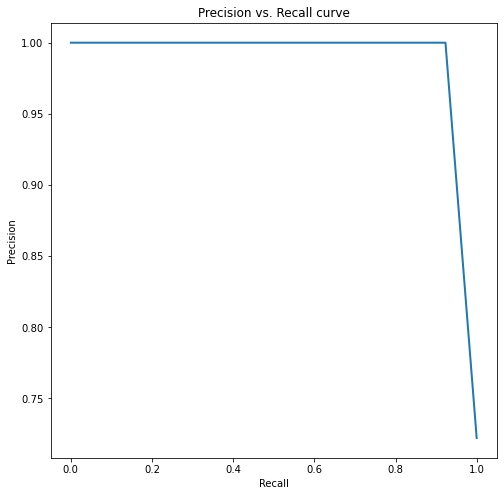

In [77]:
fig, ax = plt.subplots(figsize = (8, 8))

precision, recall, threshold = precision_recall_curve(y_test, y_pred)
ax.plot(recall, precision, lw = 2)
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall curve")
plt.show()

#### 5. We plot ROC curve graph to view its performance:

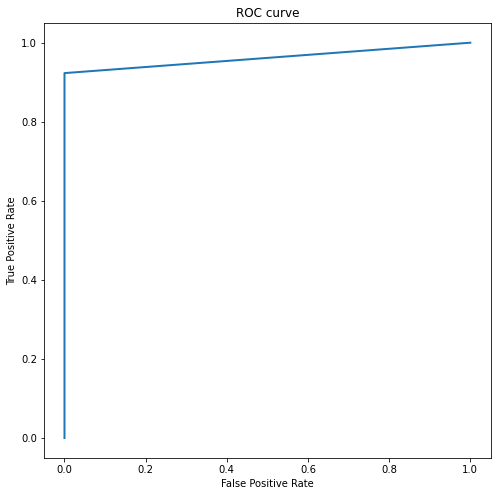

In [78]:
fig, ax = plt.subplots(figsize = (8, 8))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
ax.plot(fpr, tpr, lw = 2)
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

In [79]:
print('Best model AUC score: ', roc_auc_score(y_test, y_pred))

Best model AUC score:  0.9615384615384616


# 7. Feature Importance

In [80]:
importance = best_clf.coef_[0]

features = X_train.columns
importance_table = pd.DataFrame(sorted(zip(importance, features), reverse = True),columns = ['Score', 'Feature'])
importance_table

,Score,Feature
0,8.572477,ReusedCount
1,5.162653,Legs
2,4.561528,LandingSite_Ocean
3,4.472799,Reused
4,1.715299,LaunchSite_KSC LC 39A
5,1.061664,Year
6,1.022044,Month
7,0.831718,Orbit_MEO
8,0.777238,Orbit_LEO
9,0.202520,LandingPad_5e9e3033383ecbb9e534e7cc


<AxesSubplot:xlabel='Feature'>

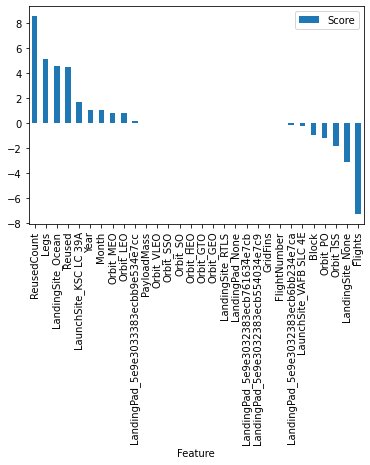

In [81]:
importance_table.plot(kind = 'bar', x = 'Feature', y = 'Score')

From the graph above, we can view the Top 5 feature importances for our prediction tasks, which are reused count, legs, landing site (ocean), reused and launch site KSC LC 39A, while the 5 least important features are flights, landing site (none), orbit ISS, orbit PO and block.

##### END.